In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

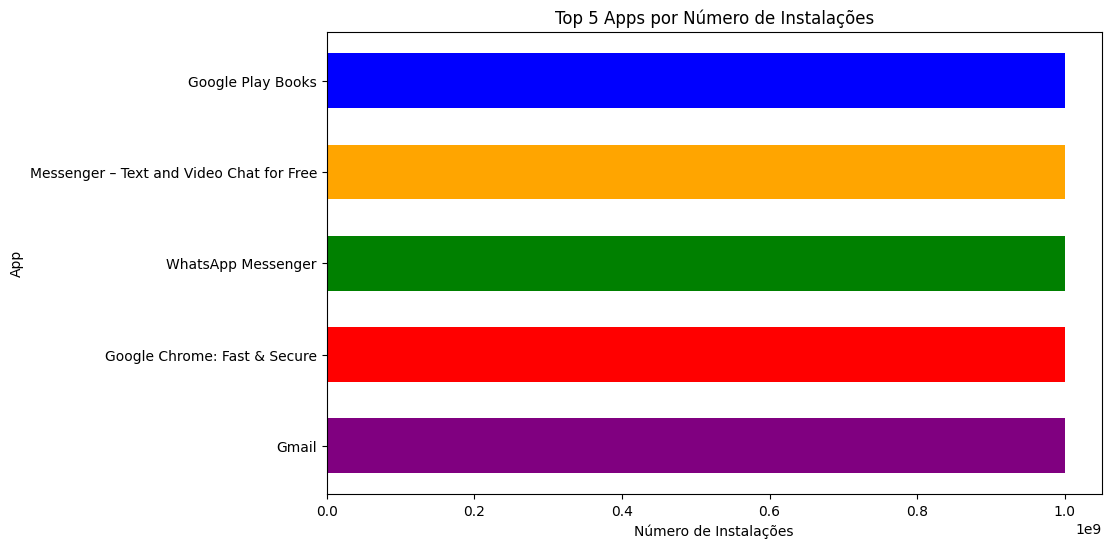

In [ ]:
import pandas as pd  # Importação da biblioteca pandas para manipulação de dados
import matplotlib.pyplot as plt  # Importação da biblioteca matplotlib para visualização gráfica

# Armazenamento do arquivo CSV 'googleplaystore.csv' no DataFrame 'file'
file = pd.read_csv('googleplaystore.csv', sep=',')

# Remoção dos dados duplicadas do DataFrame
file = file.drop_duplicates()

# Delimitação das linhas onde a coluna 'Installs' contém apenas valores numéricos
file = file[file['Installs'].str.contains(r'^\d', regex=True)]

# Remoção de caracteres especiais na coluna 'Installs' e conversão para o tipo inteiro
file['Installs'] = file['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Seleção dos 5 aplicativos com maior número de instalações 
top_5_apps = file.nlargest(5, 'Installs')[['App', 'Installs']]

# Definição de uma lista de cores para as barras no gráfico
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Criação de uma figura com tamanho específico para o gráfico de barras horizontal
plt.figure(figsize=(10, 6))

# Plota o gráfico de barras horizontal com os top 5 apps e suas respectivas instalações
plt.barh(top_5_apps['App'], top_5_apps['Installs'], color=colors, height=0.6)

# ADefinição do rótulo ao eixo Y
plt.ylabel('App')

# Definição do rótulo ao eixo X
plt.xlabel('Número de Instalações')

# Definição do título do gráfico
plt.title('Top 5 Apps por Número de Instalações')

# Inverção da ordem do eixo Y para que o maior valor apareça no topo
plt.gca().invert_yaxis()

# Exição do gráfico na tela
plt.show()



In [ ]:
import pandas as pd

dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()


# Substitui o valor do tipo string 'Free' pelo valor numérico 0
dataset['Price'] = dataset['Price'].replace('Free', 0)

# Remoção do símbolo de moeda e conversão da coluna 'Price' para o tipo float
dataset['Price'] = dataset['Price'].str.replace('$', '', regex=False)  

# Conversão da coluna 'Price' para float, transformando valores não numéricos em NaN
dataset['Price'] = pd.to_numeric(dataset['Price'], errors='coerce')

# Encontra o aplicativo mais caro e ignora o NaN (Not a number), valor especial atribuído a registros que não existem ou inválidos
app_mais_caro = dataset.loc[dataset['Price'].idxmax()]

# Exibição do nome e o preço do aplicativo mais caro
print(f"O aplicativo mais caro é: {app_mais_caro['App']} com o preço de: {app_mais_caro['Price']}")


O aplicativo mais caro é: I'm Rich - Trump Edition com o preço de: 400.0


In [ ]:
import pandas as pd

dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()

# Converção da coluna 'Reviews' para o tipo numérico 
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='coerce')

# Ordenação do dataset pela coluna 'Reviews' em ordem decrescente e selecioção dos 10 primeiros
top_10_apps = dataset[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Exibição dos resultados
print("Top 10 aplicativos por número de reviews:")
print(top_10_apps[['App', 'Reviews']].to_string(index=False))

Top 10 aplicativos por número de reviews:
                                     App    Reviews
                                Facebook 78158306.0
                                Facebook 78128208.0
                      WhatsApp Messenger 69119316.0
                      WhatsApp Messenger 69109672.0
                               Instagram 66577446.0
                               Instagram 66577313.0
                               Instagram 66509917.0
Messenger – Text and Video Chat for Free 56646578.0
Messenger – Text and Video Chat for Free 56642847.0
                          Clash of Clans 44893888.0


In [ ]:
import pandas as pd

dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()

# Conversão da coluna 'Rating' para numérico 
dataset['Rating'] = pd.to_numeric(dataset['Rating'], errors='coerce')

# Remoção das linhas com ratings nulos
dataset = dataset.dropna(subset=['Rating'])

# Top 5 aplicativos por classificação (Rating)
top_5_ratings = dataset[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(5)

# Cria uma lista para armazenar os resultados
top_5_list = []

# Preenche a lista com os aplicativos e suas classificações
for index, row in top_5_ratings.iterrows():
    top_5_list.append(f"{row['App']} - {row['Rating']} estrelas")

# Exibe a lista no formato desejado
print("\nTop 5 aplicativos por Rating (classificação):")
print("top_5_list = [")
for item in top_5_list:
    print(f"    '{item}',")
print("]")


Top 5 aplicativos por classificação (Rating):
top_5_list = [
    'Life Made WI-Fi Touchscreen Photo Frame - 19.0 estrelas',
    'EF Forms - 5.0 estrelas',
    'EF App - 5.0 estrelas',
    'Ra Ga Ba - 5.0 estrelas',
    'EG India - 5.0 estrelas',
]


In [22]:
import pandas as pd

# Carrega o arquivo CSV e remove duplicatas
dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()

# Limpa a coluna 'Installs' para converter para numérico
# Remove os caracteres '+' e ',' e converte para inteiro
dataset['Installs'] = dataset['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
dataset['Installs'] = pd.to_numeric(dataset['Installs'], errors='coerce')

# Remove as linhas com installs nulos
dataset = dataset.dropna(subset=['Installs'])

# Top 10 aplicativos por menor número de instalações
top_10_installs = dataset[['App', 'Installs']].sort_values(by='Installs', ascending=True).head(10)

# Exibe os aplicativos e suas instalações em formato de valor
print("\nTop 10 aplicativos com menor número de instalações:")
for index, row in top_10_installs.iterrows():
    print(f"{row['App']} - {row['Installs']} instalações")


Top 10 aplicativos com menor número de instalações:
EP Cook Book - 0.0 instalações
Pekalongan CJ - 0.0 instalações
cronometra-br - 0.0 instalações
Ain Arabic Kids Alif Ba ta - 0.0 instalações
CX Network - 0.0 instalações
Popsicle Launcher for Android P 9.0 launcher - 0.0 instalações
Command & Conquer: Rivals - 0.0 instalações
Sweden Newspapers - 0.0 instalações
AP Series Solution Pro - 0.0 instalações
EG | Explore Folegandros - 0.0 instalações


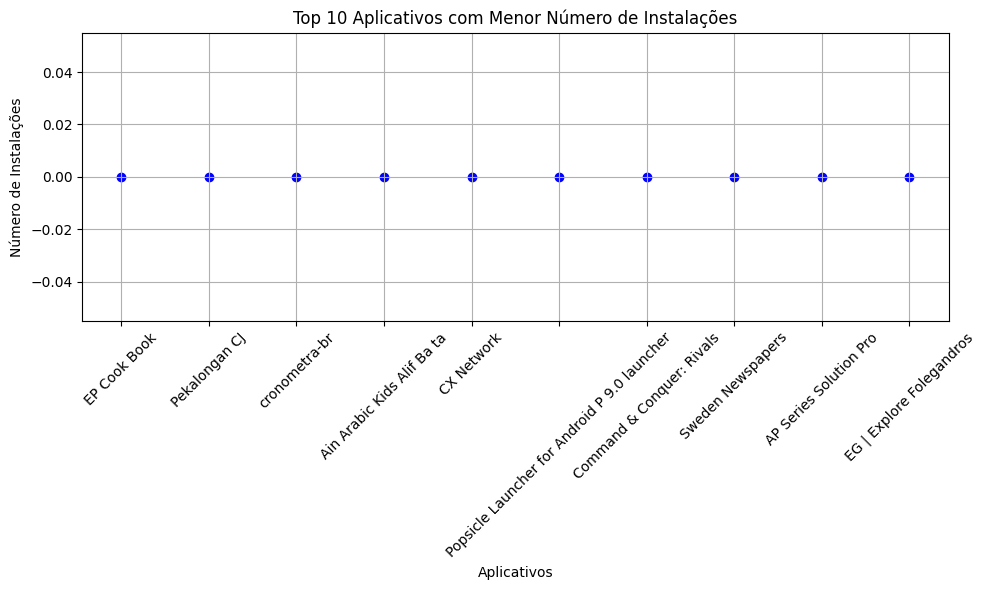

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o arquivo CSV e remove duplicatas
dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()

# Limpa a coluna 'Installs' para converter para numérico
dataset['Installs'] = dataset['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False)
dataset['Installs'] = pd.to_numeric(dataset['Installs'], errors='coerce')

# Remove as linhas com installs nulos
dataset = dataset.dropna(subset=['Installs'])

# Top 10 aplicativos por menor número de instalações
top_10_installs = dataset[['App', 'Installs']].sort_values(by='Installs', ascending=True).head(10)

# Criação do gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(top_10_installs['App'], top_10_installs['Installs'], color='blue')

# Adiciona título e rótulos
plt.title('Top 10 Aplicativos com Menor Número de Instalações')
plt.xlabel('Aplicativos')
plt.ylabel('Número de Instalações')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade

# Exibe o gráfico
plt.grid()
plt.tight_layout()  # Ajusta o layout
plt.show()

In [13]:
import pandas as pd

# Carrega o arquivo CSV e remove duplicatas
dataset = pd.read_csv('googleplaystore.csv', sep=',') 
dataset = dataset.drop_duplicates()

# Conta o número de aplicativos classificados como 'Mature 17+'
mature_apps_count = len(dataset[dataset['Content Rating'] == 'Mature 17+'])

# Exibe o resultado
print(f"Número de aplicativos classificados como 'Mature 17+': {mature_apps_count}")

Número de aplicativos classificados como 'Mature 17+': 447


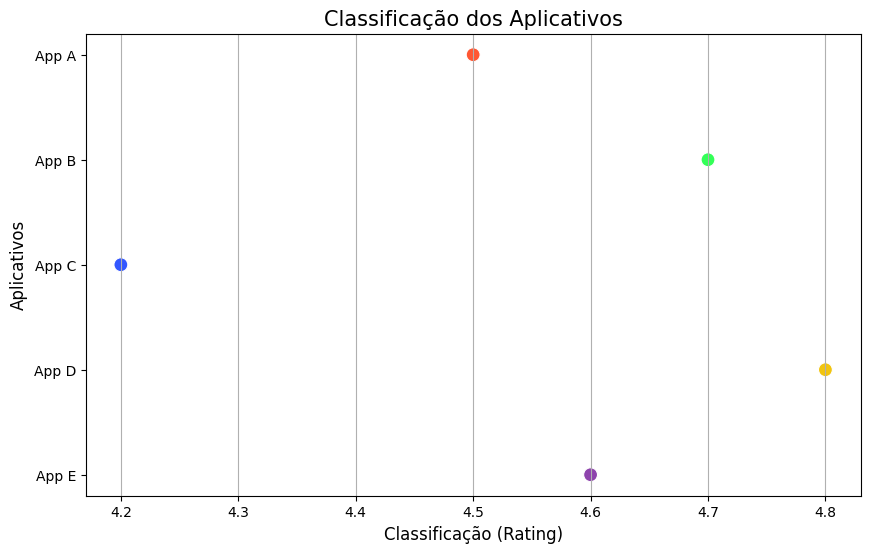

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de dados
data = {
    'App': ['App A', 'App B', 'App C', 'App D', 'App E'],
    'Rating': [4.5, 4.7, 4.2, 4.8, 4.6]
}

# Criar um DataFrame
df = pd.DataFrame(data)

# Definir cores individuais para cada ponto
cores = ['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#8E44AD']  # Cores em formato hexadecimal

# Criar o gráfico de pontos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='App', data=df, hue='App', palette=cores, s=100, legend=False)

# Adicionar título e rótulos
plt.title('Classificação dos Aplicativos', fontsize=15)
plt.xlabel('Classificação (Rating)', fontsize=12)
plt.ylabel('Aplicativos', fontsize=12)

# Exibir o gráfico
plt.grid(axis='x')
plt.show()

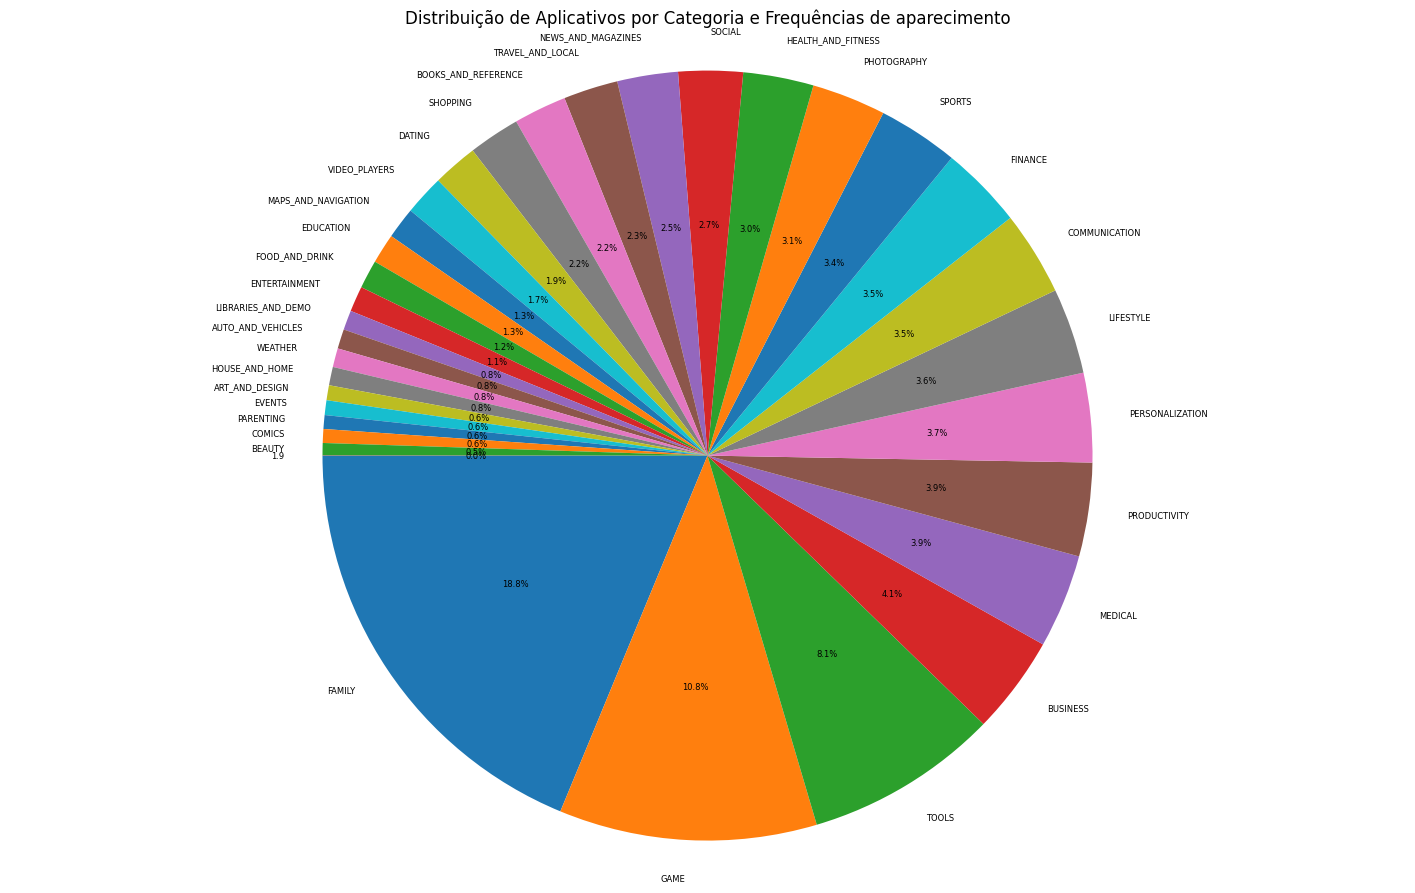

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carrega o arquivo CSV e remove duplicatas
grafico = pd.read_csv('googleplaystore.csv', sep=',')
grafico = grafico.drop_duplicates()

# Calcula a frequência das categorias
category_frequency = grafico['Category'].value_counts()

plt.figure(figsize=(18, 11))
plt.pie(category_frequency, labels=category_frequency.index, autopct='%1.1f%%', startangle=900, textprops={'fontsize': 6})
plt.title('Distribuição de Aplicativos por Categoria e Frequências de aparecimento')
plt.axis('equal') 
plt.show()

